사용한 모델
- dlib shape_predictor model file

개발환경
- Python 3+
- 프레임워크: Keras
- numpy
- matplotlib (for visualization)

데이터
- 고해상도의 눈 이미지 데이터 셋(https://github.com/iparaskev/simple-blink-detector)

In [1]:
from helpers import *
import matplotlib.pyplot as plt
import os, glob, cv2, random
import seaborn as sns
import pandas as pd

# Preview

In [2]:
base_path = 'dataset'

X, y = read_csv(os.path.join(base_path, 'dataset.csv'))

print(X.shape, y.shape) # 그레이스케일로 이루어진 2874개의 데이터

(2874, 26, 34, 1) (2874, 1)


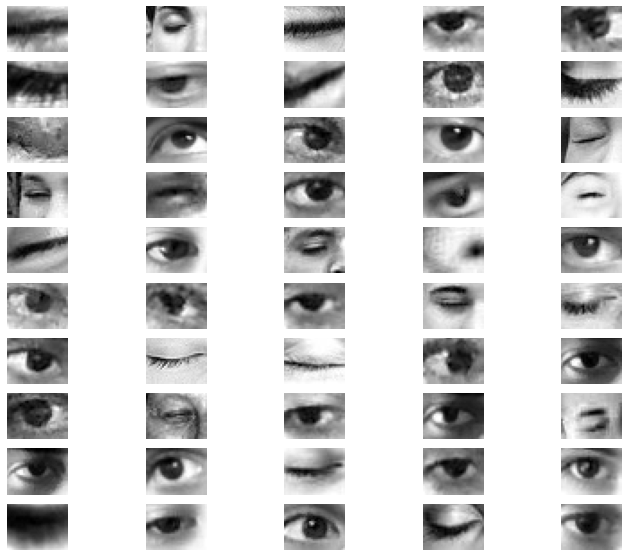

In [3]:
# 내가 봤을때 왼쪽 눈
plt.figure(figsize=(12, 10))

for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape((26, 34)), cmap='gray')

<AxesSubplot:ylabel='Count'>

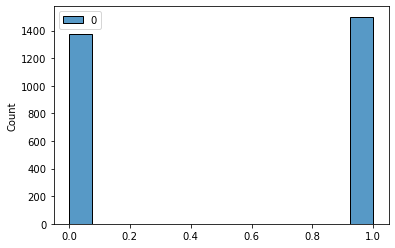

In [4]:
sns.histplot(y, kde=False)

# Preprocessing

In [5]:
# 이미지를 (26,34,1)로 동일하게 reshape 처리
n_total = len(X) #2874개
X_result = np.empty((n_total, 26, 34, 1))

for i, x in enumerate(X): # x.shape은 (26,34,1)
    img = x.reshape((26, 34, 1)) # reshape 후 img변수에 저장
    
    X_result[i] = img # 아까 만든 빈 numpy에 0번째부터 차곡차곡 저장
print(X_result.shape)

(2874, 26, 34, 1)


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_result, y, test_size=0.1)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

np.save('dataset/x_train.npy', x_train)
np.save('dataset/y_train.npy', y_train)
np.save('dataset/x_val.npy', x_val)
np.save('dataset/y_val.npy', y_val)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


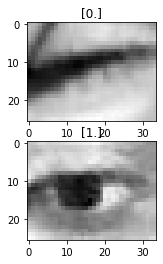

In [7]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0])) # 훈련용 정답
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray') # 훈련용 이미지
plt.subplot(2, 1, 2)
plt.title(str(y_val[4])) # 테스트용 정답
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray') # 테스트용 이미지

<AxesSubplot:ylabel='Count'>

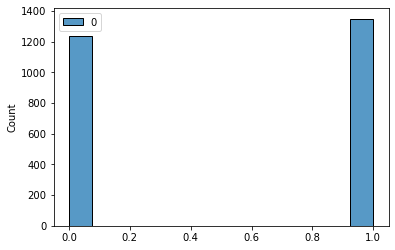

In [8]:
sns.histplot(y_train, kde=False)

<AxesSubplot:ylabel='Count'>

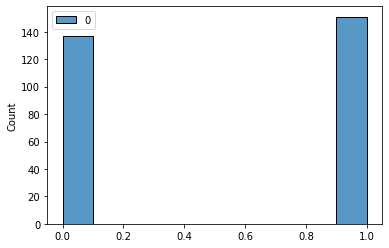

In [9]:
sns.histplot(y_val, kde=False)